# Day 0 Tutorial: Housing Prices Prediction

Welcome! In this tutorial we will do a recap on the basics of machine learning. Our task is to go through the full process of creating a machine learning model that is able to successfully predict the resale price of a house, given its features.

## Dataset

Suburb: Suburb

Address: Address

Rooms: Number of rooms

Price: Price in Australian dollars

Method:

S - property sold;

SP - property sold prior;

PI - property passed in;

PN - sold prior not disclosed;

SN - sold not disclosed;

NB - no bid;

VB - vendor bid;

W - withdrawn prior to auction;

SA - sold after auction;

SS - sold after auction price not disclosed.

N/A - price or highest bid not available.

Type:

br - bedroom(s);

h - house,cottage,villa, semi,terrace;

u - unit, duplex;

t - townhouse;

dev site - development site;

o res - other residential.

SellerG: Real Estate Agent

Date: Date sold

Distance: Distance from CBD in Kilometres

Regionname: General Region (West, North West, North, North east …etc)

Propertycount: Number of properties that exist in the suburb.

Bedroom2 : Scraped # of Bedrooms (from different source)

Bathroom: Number of Bathrooms

Car: Number of carspots

Landsize: Land Size in Metres

BuildingArea: Building Size in Metres

YearBuilt: Year the house was built

CouncilArea: Governing council for the area

Lattitude: The angular distance north or south of the earth's equator, measured in degrees along a meridian, as on a map or globe.

Longtitude: Longitude is a geographic coordinate that specifies the east–west position of a point on the Earth's surface, or the surface of a celestial body. 

## Data Ingestion

To begin, we first need to import our data. The data set is a tabular data set (in the format of a table, with rows and columns e.g. like an Excel spreadsheet)

As such we make use of the **Pandas** library to load in the data. Pandas is a python library that allows for the loading and manipulation of tabular data.

### CSV Files

The file format of our data is a **csv** file. **csv** stands for **comma separated values**. To understand what that means, let's see what the file we are using looks like when we load it using a text editor.



```
Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
Abbotsford,68 Studley St,2,h,,SS,Jellis,3/09/2016,2.5,3067,2,1,1,126,,,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019
Abbotsford,85 Turner St,2,h,1480000,S,Biggin,3/12/2016,2.5,3067,2,1,1,202,,,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019
Abbotsford,25 Bloomburg St,2,h,1035000,S,Biggin,4/02/2016,2.5,3067,2,1,0,156,79,1900,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019
Abbotsford,18/659 Victoria St,3,u,,VB,Rounds,4/02/2016,2.5,3067,3,2,1,0,,,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019
Abbotsford,5 Charles St,3,h,1465000,SP,Biggin,4/03/2017,2.5,3067,3,2,0,134,150,1900,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019
```

Observe that each column value is separated using a **comma**. 


To load a csv file in Pandas, we can use `pd.read_csv(file)`, typing out the file location inside the brackets.

### Dataframes
Pandas will then read the csv file and load it in as a **DataFrame**. A **DataFrame** is a data structure that holds tabular data. 

To see the first five rows of the dataframe, we use the `.head()` method.


In [ ]:
import pandas as pd # Load the pandas library. We give it the alias pd to make our subsequent code shorter.
import warnings
warnings.simplefilter("ignore") # Filter out any warnings
df = pd.read_csv("https://raw.githubusercontent.com/SPAI-Team/Advanced-ML-Workshop-2021/main/Datasets/melb_data.csv")
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


## Exploratory Data Analysis

Once we've loaded our data, it's time to get familar with the data set we'll be working with throughout this notebook. We do this by conducting an **Exploratory Data Analysis**.

The purpose of EDA is to help us look at the data before we make any assumptions about it. This lets us spot errors in the data (which would mess up any machine learning algorithm), understand patterns in the data, spot anomalies/outliers, and gain insight into relationships between variables.

Let's start by taking a look at the dataframe in general. We use the `.info()` method to get a list of all the columns, their data types, and how many rows in each column are not missing values.

In [ ]:
# DataFrame Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

There are a few things we should look out for:
- Data Types: Do the data types match up with what we expect?
  - We observe that certain columns like `YearBuilt`, `Car`, etc are marked as floats. Floats are numbers with decimal points. In reality, we wouldn't expect there to be decimal places for these columns, so they should have been marked as ints (Integers).
  - The reason for this is actually because of missing values present in these columns. Missing values are represented by a special type of float, causing the entire feature to be considered a float. 
  - The `Postcode` column is considered a float. In reality, it's actually a category. Having a higher or lower postal code doesn't tell me how good your house is. It should have the `category` data type.
  - `Date` is an object (meaning text), when it should be a datetime.
- Missing Values: Which columns/features have missing values?
  - We see that there are 14 columns with missing values. 
  - Notably some features like `BuildingArea` have a lot of missing values. This will become important later.
  - Our target feature (that is, the feature we are trying to train our model to predict) is `Price`. We notice it does have some missing values.

### Dealing with Wrong Data Types

In [ ]:
# First 5 rows of the DataFrame
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [ ]:
df["Postcode"] = df["Postcode"].astype("Int64").astype("category") # convert to Int first to remove the decimal places

In [ ]:
# Convert `Date` into DateTime Format
df["Date"] = pd.to_datetime(df["Date"], format='%d/%M/%Y')

In [ ]:
# Updated change on Data Types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Suburb         13580 non-null  object        
 1   Address        13580 non-null  object        
 2   Rooms          13580 non-null  int64         
 3   Type           13580 non-null  object        
 4   Price          13580 non-null  float64       
 5   Method         13580 non-null  object        
 6   SellerG        13580 non-null  object        
 7   Date           13580 non-null  datetime64[ns]
 8   Distance       13580 non-null  float64       
 9   Postcode       13580 non-null  category      
 10  Bedroom2       13580 non-null  float64       
 11  Bathroom       13580 non-null  float64       
 12  Car            13518 non-null  float64       
 13  Landsize       13580 non-null  float64       
 14  BuildingArea   7130 non-null   float64       
 15  YearBuilt      8205

### Summarising the Distribution of Data

#### Descriptive Statistics

In [ ]:
# Descriptive Statistics on Numerical Columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rooms,13580.0,2.937997e+00,0.955748,1.00000,2.000000,3.000000,3.000000e+00,1.000000e+01
Price,13580.0,1.075684e+06,639310.724296,85000.00000,650000.000000,903000.000000,1.330000e+06,9.000000e+06
Distance,13580.0,1.013778e+01,5.868725,0.00000,6.100000,9.200000,1.300000e+01,4.810000e+01
Bedroom2,13580.0,2.914728e+00,0.965921,0.00000,2.000000,3.000000,3.000000e+00,2.000000e+01
Bathroom,13580.0,1.534242e+00,0.691712,0.00000,1.000000,1.000000,2.000000e+00,8.000000e+00
Car,13518.0,1.610075e+00,0.962634,0.00000,1.000000,2.000000,2.000000e+00,1.000000e+01
Landsize,13580.0,5.584161e+02,3990.669241,0.00000,177.000000,440.000000,6.510000e+02,4.330140e+05
BuildingArea,7130.0,1.519676e+02,541.014538,0.00000,93.000000,126.000000,1.740000e+02,4.451500e+04
YearBuilt,8205.0,1.964684e+03,37.273762,1196.00000,1940.000000,1970.000000,1.999000e+03,2.018000e+03
Lattitude,13580.0,-3.780920e+01,0.079260,-38.18255,-37.856822,-37.802355,-3.775640e+01,-3.740853e+01


In [ ]:
# Descriptive Statistics on Categorical Columns
df.describe(include=['object', 'category']).T

,count,unique,top,freq
Suburb,13580,314,Reservoir,359
Address,13580,13378,5 Margaret St,3
Type,13580,3,h,9449
Method,13580,5,S,9022
SellerG,13580,268,Nelson,1565
Postcode,13580,198,3073,359
CouncilArea,12211,33,Moreland,1163
Regionname,13580,8,Southern Metropolitan,4695


#### Graphical Summary

While the descriptive statistics give us an idea of what our data is like, it does not give the whole view of our data. As the old adage goes, a picture says a thousand words.

To quickly plot out a summary of our data, we will make use of the inbuilt plotting functions within Pandas, as well as the **matplotlib** and **seaborn** libraries.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() # This automatically updates the style of our plots to make them look nicer

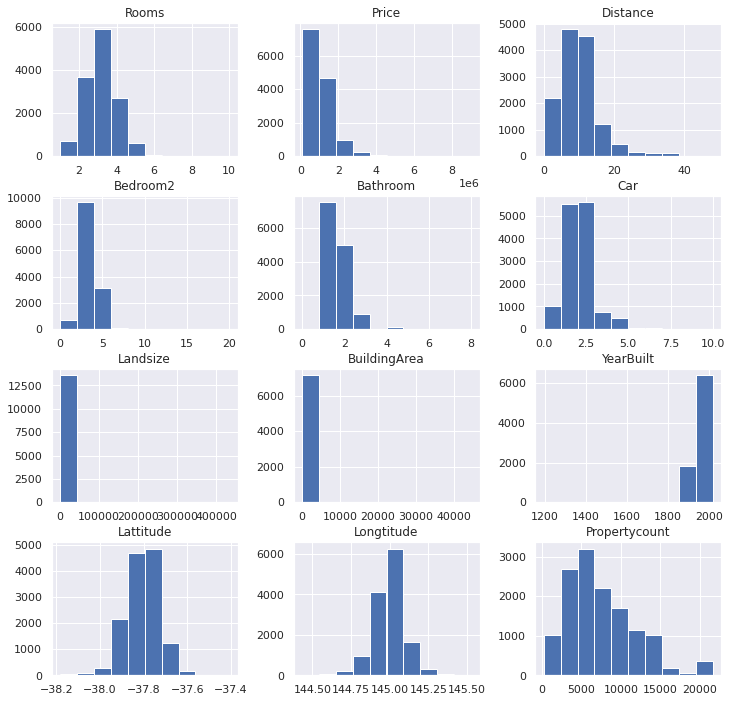

In [ ]:
# Histogram on Numerical Columns
df.hist(figsize=(12, 12))
plt.show()

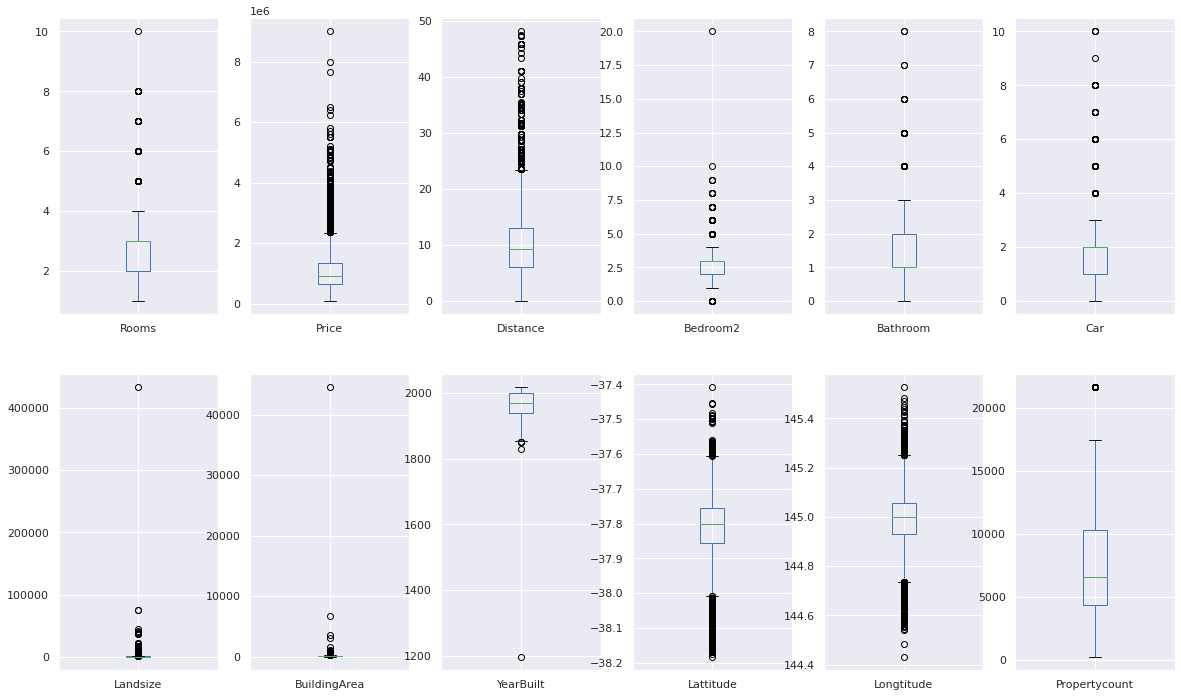

In [ ]:
# Boxplots on all Numerical Columns
df.plot(kind='box', figsize=(20, 12), layout=(2, 6), subplots=True)
plt.show()

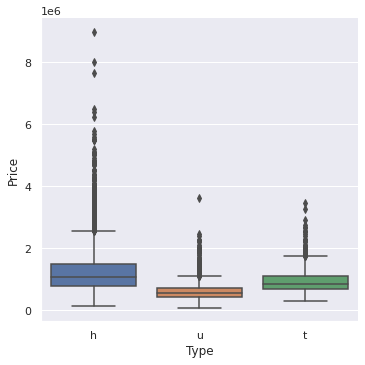

In [ ]:
# Bivariate Analysis between Price and Type
sns.catplot(data=df, y="Price", x="Type", kind="box")
plt.show()

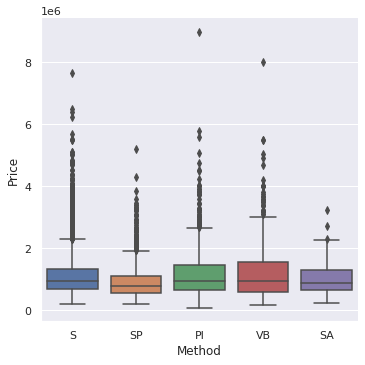

In [ ]:
# Bivariate Analysis between Price and Method
sns.catplot(data=df, y="Price", x="Method", kind="box")
plt.show()

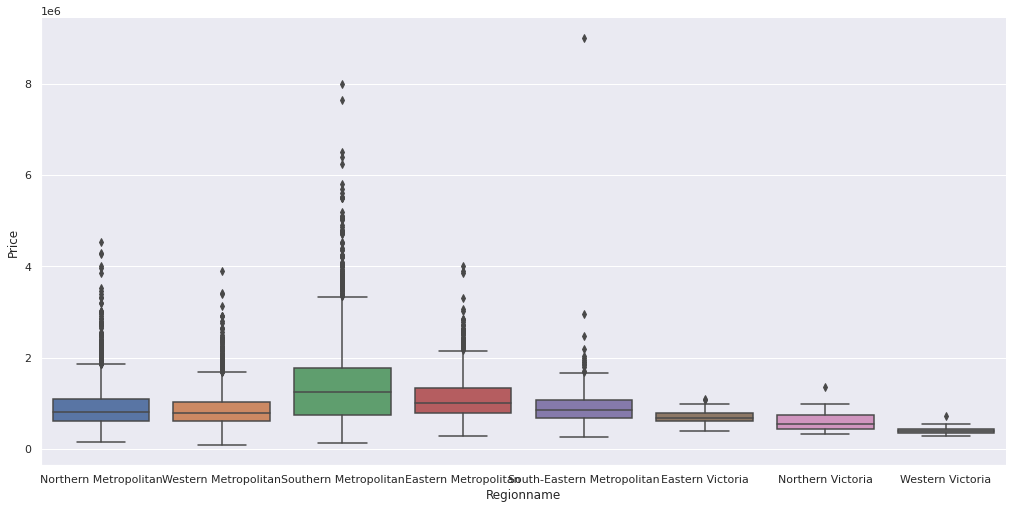

In [ ]:
# Bivariate Analysis between Price and Regionname
sns.catplot(data=df, y="Price", x="Regionname", kind="box", height = 7, aspect = 2)
plt.show()

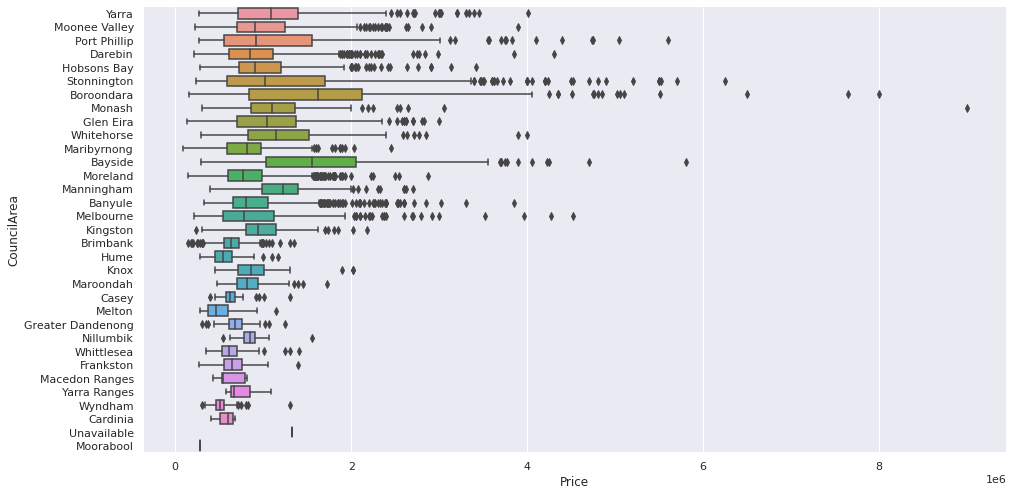

In [ ]:
# Bivariate Analysis between Price and CouncilArea
sns.catplot(data=df, x="Price", y="CouncilArea", kind="box", height = 7, aspect = 2)
plt.show()

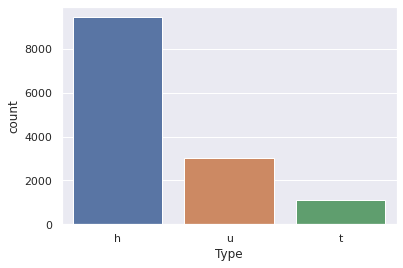

In [ ]:
# Frequency Count on Type
sns.countplot(x="Type", data=df)

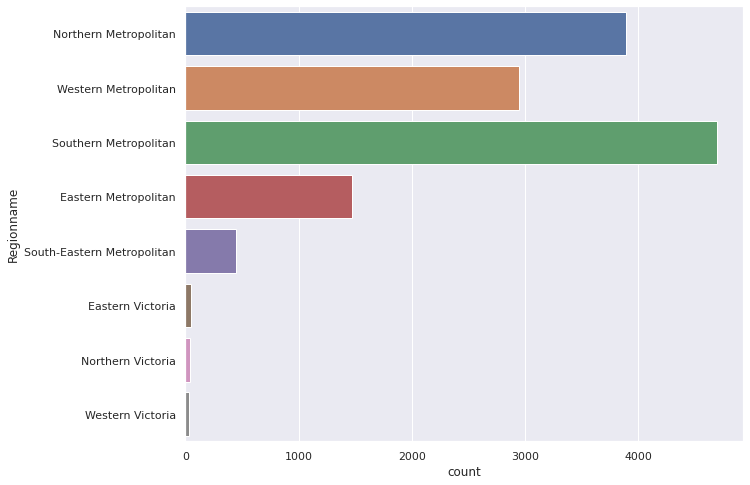

In [ ]:
# Frequency Count on Regionname
fig, ax = plt.subplots(figsize=(10, 8))
sns.countplot(y="Regionname", data=df, ax=ax)

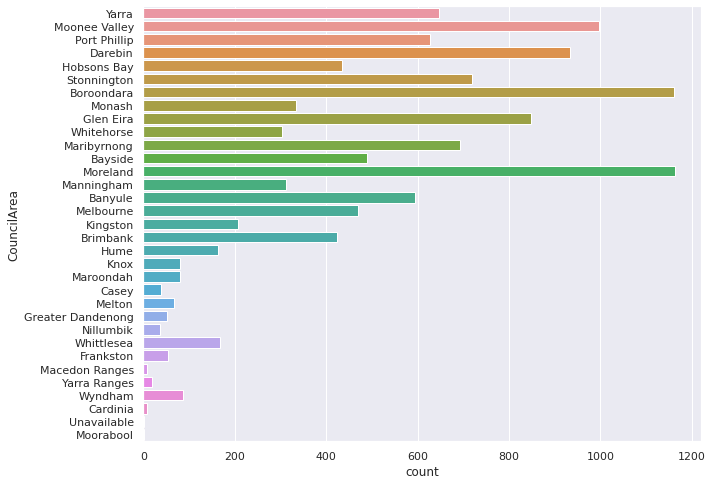

In [ ]:
# Frequency Count on CouncilArea
fig, ax = plt.subplots(figsize=(10, 8))
sns.countplot(y="CouncilArea", data=df, ax=ax)
plt.show()

### Relationships Between Variables

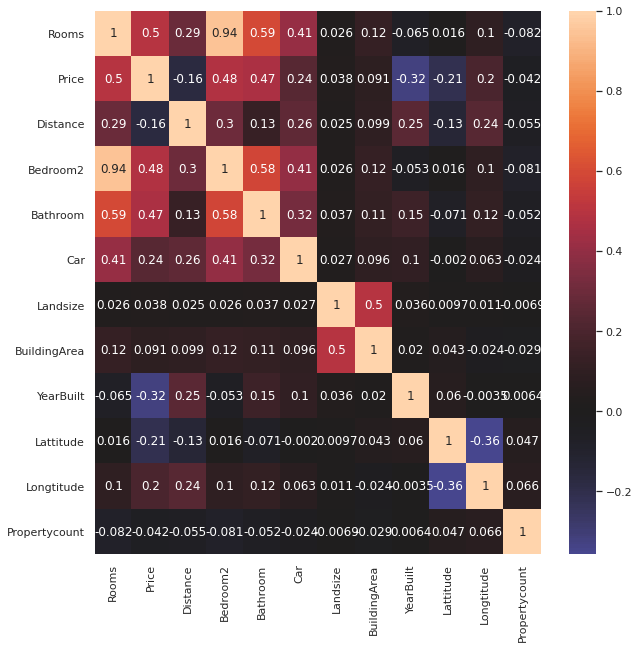

In [ ]:
# Pearson's r Correlation Matrix
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(df.corr(), ax = ax, annot=True, center=0)
plt.show()

We observe the prices of the houses are most highly correlated with the number of rooms.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


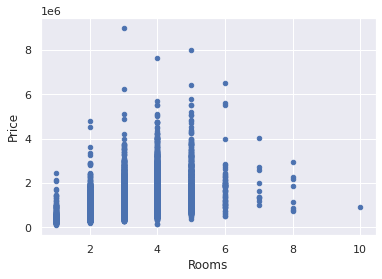

In [ ]:
# Scatterplot between Rooms and Price
df.plot(x="Rooms", y="Price", kind="scatter")

## Data Pre-processing

In [ ]:
# Preprocessing Functions
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
# Data Partition Functions
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
# Ignore any unnessary warnings
from warnings import filterwarnings
filterwarnings('ignore')

### Data Splits

#### Train Test Split
Before we process our data, it is necessary for us to split our data into a training and testing set. 

In [ ]:
# Define y (Target) and X (Input Features)
cols = ["Rooms", "Type", "Distance", "Bedroom2", "Bathroom", "Car", "Landsize", "BuildingArea", "Lattitude", "Longtitude", "Regionname"]
categorical_cols = ["Type", "Regionname"]
numerical_cols = ["Rooms", "Distance", "Bedroom2", "Bathroom", "Car", "Landsize", "BuildingArea", "Lattitude", "Longtitude"]

df = df.dropna(subset=["Price"]) # remove rows from the data where the target we are trying to predict is missing
y = df["Price"]
X = df[cols]

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print('X_train:', X_train.shape, '\ty_train', y_train.shape, '\nX_test', X_test.shape, '\ty_test', y_test.shape)

X_train: (10864, 11) 	y_train (10864,) 
X_test (2716, 11) 	y_test (2716,)


### Dealing with Missing Data

#### Imputation
Let's take a look at how many missing values there are in our data set.

To count the number of missing values, we chain two methods together, `.isna()` and `.sum()`. This means that we first assign a True (1) or False (0) value depending on if the value is missing, then for each feature sum them up to get the number of True values.

In [ ]:
# Count number of missing values in data set.
X.isna().sum()

Rooms              0
Type               0
Distance           0
Bedroom2           0
Bathroom           0
Car               62
Landsize           0
BuildingArea    6450
Lattitude          0
Longtitude         0
Regionname         0
dtype: int64

We observe that we only have missing data in the `Car` and `BuildingArea` features, both of which are numerical. 

Since we want our model to be able to deal with missing data in the future (say, I wanted to create a model that could be used by people, whom may not have some of the information required by the model), we will need to create Imputers for our data.

We can accomplish this using the scikit-learn `SimpleImputer` transformer, which can use up to three strategies to impute our data. They are:

1. Impute via the mean value of each feature (Numerical Data only)
2. Impute via the median value of each feature (Numerical Data only)
3. Impute via the mode (most common) value of each feature (Categorical Data only)

We can create a scikit-learn Imputer by constructing one and assigning it to a variable like so:
```python
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
```

The imputer then needs to be fitted. In the context of imputation, fitting means that the imputer needs to calculate the mean/median/mode value of each feature in the data. 

```python
imputer.fit(X_train)
```

When we implement any form of data preprocessing like Imputation we need to take care to avoid fitting to the entire dataset. This means we should not get the imputer to calculate the mean/median/mode of the entire dataset, but rather only the training set, and use it to impute everything. This is because using the entire dataset would cause information leakage.

Once fitted, we can then use the calculated mean/median/mode to transform our data. That is, replace missing values with the mean/median/mode of its column.

```python
X_train = imputer.transform(X_train)
```

Note that when the imputer transforms the data, it is **not returned as a DataFrame**. scikit-learn will instead convert it into a array. If we want our data to be in the form of a DataFrame, we need to convert it back to one, or assign the result of the transformation to the columns of the old dataframe (as will be done in the subsequent code in this tutorial)

Finally, we can combine both the fit and transform phase into a single line of code using `.fit_transform()`.

##### Numerical Data

In [ ]:
numerical_imputer = SimpleImputer(strategy='median') # Initiate Median Imputer Class
X_train[numerical_cols] = numerical_imputer.fit_transform(X_train[numerical_cols]) # Fit and Transform Imputer onto X_train
X_train.isnull().sum()

Rooms           0
Type            0
Distance        0
Bedroom2        0
Bathroom        0
Car             0
Landsize        0
BuildingArea    0
Lattitude       0
Longtitude      0
Regionname      0
dtype: int64

In [ ]:
# We will not use fit_transform as we have already fitted the data to the training set. 
# We want to use the fitted values from the training set to transfrom our testing set.
X_test[numerical_cols] = numerical_imputer.transform(X_test[numerical_cols]) # Impute X_test based on X_train median values

##### Categorical Data
Admittedly, there are no missing categorical values in the filtered data set used, so the below section is just a demonstration.

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10864 entries, 2728 to 1056
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rooms         10864 non-null  float64
 1   Type          10864 non-null  object 
 2   Distance      10864 non-null  float64
 3   Bedroom2      10864 non-null  float64
 4   Bathroom      10864 non-null  float64
 5   Car           10864 non-null  float64
 6   Landsize      10864 non-null  float64
 7   BuildingArea  10864 non-null  float64
 8   Lattitude     10864 non-null  float64
 9   Longtitude    10864 non-null  float64
 10  Regionname    10864 non-null  object 
dtypes: float64(9), object(2)
memory usage: 1018.5+ KB


In [ ]:
categorical_imputer = SimpleImputer(strategy='most_frequent') # Initiate Mode Imputer Class
X_train[categorical_cols] = categorical_imputer.fit_transform(X_train[categorical_cols]) # Fit and Transform Imputer onto X_train

In [ ]:
X_test[categorical_cols] = categorical_imputer.transform(X_test[categorical_cols]) # Impute X_test based on X_train mode values

### Encoding Categorical Variables & Feature Scaling
Our dataset contains two categorical features: `Type` and `Regionname`. From the data set description of these two features, there does not appear to be a natural ordering for values of those features, so both are nominal variables, and need to be one hot encoded.

We will make use of the `get_dummies` function in Pandas to one hot encode our data (it is also possible to do in in scikit-learn, but we'll be covering this in the subsequent days)


In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10864 entries, 2728 to 1056
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rooms         10864 non-null  float64
 1   Type          10864 non-null  object 
 2   Distance      10864 non-null  float64
 3   Bedroom2      10864 non-null  float64
 4   Bathroom      10864 non-null  float64
 5   Car           10864 non-null  float64
 6   Landsize      10864 non-null  float64
 7   BuildingArea  10864 non-null  float64
 8   Lattitude     10864 non-null  float64
 9   Longtitude    10864 non-null  float64
 10  Regionname    10864 non-null  object 
dtypes: float64(9), object(2)
memory usage: 1018.5+ KB


In [ ]:
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

By default, the scaler will transform our data into an array as shown in the code cell below.

In [ ]:
scaler.transform(X_train)

array([[-0.98830396, -0.63875077, -0.94823518, ..., -0.71998525,
         1.89877362, -0.05173501],
       [ 0.06320267,  0.63033382,  1.12098788, ...,  1.38891735,
        -0.52665573, -0.05173501],
       [ 0.06320267,  1.91633954,  0.08637635, ..., -0.71998525,
        -0.52665573, -0.05173501],
       ...,
       [ 0.06320267, -1.12946348,  0.08637635, ...,  1.38891735,
        -0.52665573, -0.05173501],
       [ 1.11470931,  0.61341269,  1.12098788, ..., -0.71998525,
        -0.52665573, -0.05173501],
       [ 0.06320267,  0.17346337,  0.08637635, ...,  1.38891735,
        -0.52665573, -0.05173501]])

In [ ]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Model Building and Validation

Now, we want to build our machine learning algorithms. It turns out that in scikit-learn, this is very easy. In fact, the procedure is almost the same as using the scikit-learn transformers (e.g. `SimpleImputer`, `OneHotEncoder`). 


1. Use `.fit()` to fit the model to the training data
2. Use `.predict()` to generate predictions on the training and test sets
3. Using the training and test predictions, compare it with the actual answer to evaluate how good the model is.

In this tutorial, we will evaluate two models: Linear Regression and Random Forests

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

### Linear Regression
Linear Regression is a model that tries to use a linear model to predict the value given some inputs. You've probably seen it in a simpler form, with a single variable as the equation $y=mx+c$.

![Simple Linear Regression](https://upload.wikimedia.org/wikipedia/commons/thumb/3/3a/Linear_regression.svg/1920px-Linear_regression.svg.png)

In essence, linear regression tries to find the best slope and intercept terms for this line.

In machine learning, we often add more variables (features) to the linear regression model resulting in a more complicated model.

![Multiple Linear Regression](https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fi.stack.imgur.com%2FetOb8.png&f=1&nofb=1)

For example, this 3D visualisation shows what happens when we extend the simple linear regression model to use two features as its input. In this case, the model equation would be something like $y = a + bx_1 + cx_2$.

In [ ]:
print("Linear Regression")
linreg = LinearRegression()

linreg.fit(X_train, y_train)

y_train_preds = linreg.predict(X_train)
y_test_preds = linreg.predict(X_test)

print("Training Set Mean Squared Error:", mean_squared_error(y_train, y_train_preds))
print("Testing Set Mean Squared Error:", mean_squared_error(y_test, y_test_preds))


print("Training Set Root Mean Squared Error:", mean_squared_error(y_train, y_train_preds, squared=False))
print("Testing Set Root Mean Squared Error:", mean_squared_error(y_test, y_test_preds, squared=False))

Linear Regression
Training Set Mean Squared Error: 166252064497.41092
Testing Set Mean Squared Error: 169412780493.06775
Training Set Root Mean Squared Error: 407740.1923988006
Testing Set Root Mean Squared Error: 411597.8382997993


### Random Forests

In simple terms, a Random Forest model works by training many decision trees on overlapping random subsets of data.  

![](https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fmiro.medium.com%2Fmax%2F1482%2F0*Srg7htj4TOMP5ldX.png&f=1&nofb=1)

In [ ]:
print("Random Forests")
random_forest = RandomForestRegressor()

random_forest.fit(X_train, y_train)

y_train_preds = random_forest.predict(X_train)
y_test_preds = random_forest.predict(X_test)

print("Training Set Mean Squared Error:", mean_squared_error(y_train, y_train_preds))
print("Testing Set Mean Squared Error:", mean_squared_error(y_test, y_test_preds))


print("Training Set Root Mean Squared Error:", mean_squared_error(y_train, y_train_preds, squared=False))
print("Testing Set Root Mean Squared Error:", mean_squared_error(y_test, y_test_preds, squared=False))

Random Forests
Training Set Mean Squared Error: 11606420599.758543
Testing Set Mean Squared Error: 85179803412.50632
Training Set Root Mean Squared Error: 107733.09890539
Testing Set Root Mean Squared Error: 291855.7921517171


# The End
This concludes the tutorial notebook.